In [1]:
import os, sys

from myptv.calibrate_mod import calibrate
from myptv.imaging_mod import camera, img_system


import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

# estimate camera internal parameters:


First we estimate the focal distance of my camera (a Samsung J2 core front camera). We do this by placing the camera at a known location and taking an image of an object with a known size (I used a ruler)

In [2]:
# manually extracted two calibration points:
calPointsParams = {1: [(0., -25., 0.), (1570, 1490)],
                   2: [(0.,  85., 0.), (1567, 419) ]}

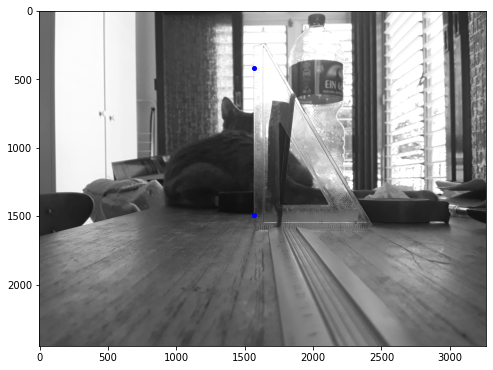

In [3]:
img_internalCal = color.rgb2gray(io.imread('CalInternalParams.jpg'))


fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.imshow(img_internalCal, cmap='gray')

for k in calPointsParams.keys():
    ax.plot(calPointsParams[k][1][0], calPointsParams[k][1][1], 'ob', ms=4)


#### estimating f manually:

We first enter the position and orientation of the camera, and a guess of the focal length f. We then use the calibrate class to project points (red crosses) and correct our guess of f, untill we get a good agreement:

(1400.0, 1800.0)

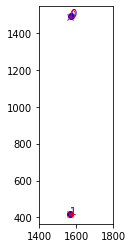

In [4]:
labCoordsCal = [calPointsParams[k][0] for k in sorted(calPointsParams.keys())]
imgCoordsCal = [calPointsParams[k][1] for k in sorted(calPointsParams.keys())]
cam_resolution = 3264, 2448


camCal = camera('camCal', cam_resolution)   # <-- camera class


# give initial guess for camera parameters:
camCal.O = np.array([7., 1.35, 312.0])      # <-- measured imaging center
camCal.theta = np.array([3.14, 0.0, 0.0])   # <-- measured camera orientation
camCal.f = 3020                               # <-- guesses for the focal length
camCal.calc_R()

calCal = calibrate(camCal,labCoordsCal, imgCoordsCal)  # <-- the calibrate class used for projections


# plot our guesses:
fig, ax = plt.subplots()
calCal.plot_proj(ax=ax)
ax.set_xlim(1400,1800)

# mark calibration points:

##### data from the calibration images extracted manually:

In [5]:
# for uncropped images:

img1 = color.rgb2gray(io.imread('cal1.jpg'))
img2 = color.rgb2gray(io.imread('cal2.jpg'))

calPoints_1 = {1: [(0. , 0., 0.), (1099, 1741)],
               2: [(30. , 0., 0.),(1385, 1800)],
               3: [(60., 0., 0.), (1690, 1862)],
               5: [(30.,40., 0.), (1415, 1411)],
               6: [(60.,40., 0.), (1739, 1466)],
               7: [(0., 70., 0.), (1121, 1052)],
               8: [(30.,70., 0.), (1440, 1094)],
               9: [(60.,70., 0.), (1781, 1138)]}


calPoints_2 = {1: [(0. , 0., 0.), (1017, 1595) ],
               2: [(30., 0., 0.), (1306, 1572) ],
               3: [(60., 0., 0.), (1582, 1550) ],
               5: [(30.,40., 0.), (1314, 1188) ],
               6: [(60.,40., 0.), (1604, 1173) ],
               7: [(0., 70., 0.), (1008, 888 ) ],
               8: [(30.,70., 0.), (1321, 879 ) ],
               9: [(60.,70., 0.), (1623, 868 ) ]}

#### Show the images and mark the given coordinates:

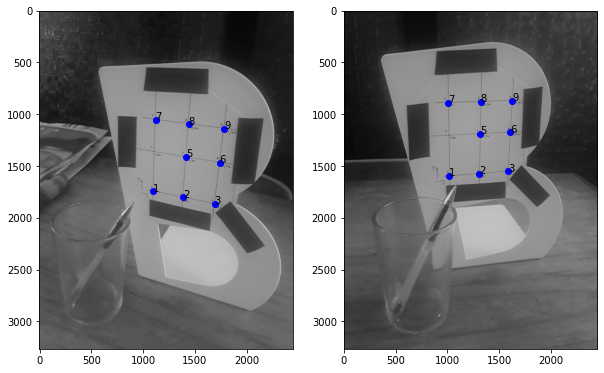

In [6]:
%matplotlib inline

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,8)

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')


for k in calPoints_1:
    ax[0].plot(calPoints_1[k][1][0], calPoints_1[k][1][1], 'bo')
    ax[0].text(calPoints_1[k][1][0], calPoints_1[k][1][1], str(k))
    
    
for k in calPoints_2:
    ax[1].plot(calPoints_2[k][1][0], calPoints_2[k][1][1], 'bo')
    ax[1].text(calPoints_2[k][1][0], calPoints_2[k][1][1], str(k))

# Calibrate cameras:

### camera 1:

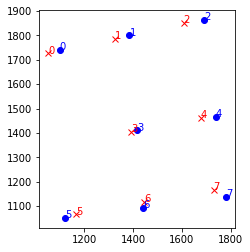

In [7]:
imgCoords_1 = [np.array(calPoints_1[k][1]) for k in sorted(calPoints_1)]
labCoords1 = [np.array(calPoints_1[k][0]) for k in sorted(calPoints_1)]

cam_resolution = 3264, 2448

cam1 = camera('cam1', img1.shape)


# give initial guess for camera parameters:
cam1.O = np.array([105.0, 72.0, 300.0])
cam1.theta = np.array([3.14, -0.18, -0.18])
cam1.f=3020
cam1.calc_R()

cal1 = calibrate(cam1,labCoords1, imgCoords_1)

# plot initial guess
cal1.plot_proj()

Optimization terminated successfully.
         Current function value: 4.076361
         Iterations: 1259
         Function evaluations: 1867
Optimization terminated successfully.
         Current function value: 4.076361
         Iterations: 174
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 4.076361
         Iterations: 168
         Function evaluations: 321


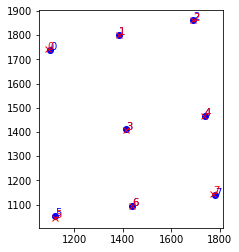

In [8]:
# optimize camera parameters three times and plot:
for i in range(3):
    cal1.searchCalibration()
    
#cal1.searchCalibration(fix_f=False)

cal1.plot_proj()

In [9]:
print('O: ', cam1.O)
print('theta: ', cam1.theta)
print('f: ', cam1.f)

O:  [ 97.66473762 141.45598187 248.54661263]
theta:  [ 3.4293421  -0.22475369 -0.09602398]
f:  3020


### camera 2:

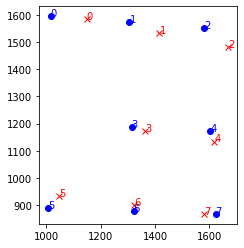

In [10]:
imgCoords_2 = [np.array(calPoints_2[k][1]) for k in sorted(calPoints_2)]
labCoords2 = [np.array(calPoints_2[k][0]) for k in sorted(calPoints_2)]

cam_resolution = 3264, 2448

cam2 = camera('cam2', img2.shape)


# give initial guess for camera parameters:
cam2.O = np.array([-55.0, 50.0, 320.0])
cam2.theta = np.array([3.15, 0.35, 0.15])
cam2.f = 3020
cam2.calc_R()

cal2 = calibrate(cam2,labCoords2, imgCoords_2)

# plot initial guess
cal2.plot_proj()

Optimization terminated successfully.
         Current function value: 5.092491
         Iterations: 2516
         Function evaluations: 3690
Optimization terminated successfully.
         Current function value: 5.092204
         Iterations: 301
         Function evaluations: 493
Optimization terminated successfully.
         Current function value: 5.091810
         Iterations: 463
         Function evaluations: 739


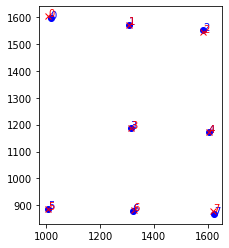

In [11]:
# optimize camera parameters three times and plot:
for i in range(3):
    cal2.searchCalibration()
    
#cal2.searchCalibration(fix_f=False)
    
# plot initial guess
cal2.plot_proj()

In [12]:
print('O: ', cam2.O)
print('theta: ', cam2.theta)
print('f: ', cam2.f)

O:  [-53.4106567  118.65109465 270.5228018 ]
theta:  [ 3.44325734  0.39109124 -0.06002647]
f:  3020


# Finding the location of coordinate point 4:

In [13]:
particleCoords = {0: (1107, 1363),
                  1: (1012, 1202)}

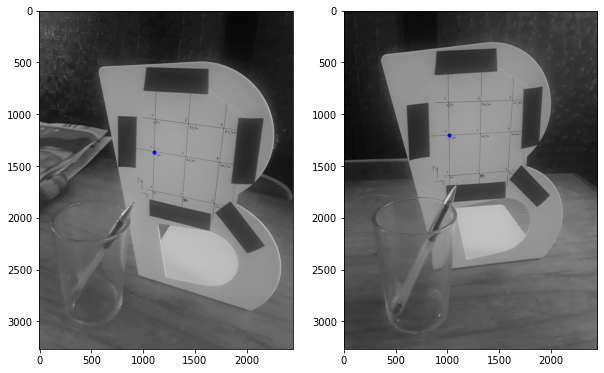

In [14]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,8)

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

for k in particleCoords.keys():
    ax[k].plot(particleCoords[k][0], particleCoords[k][1], 'bo', ms=3)


In [15]:
# setting up an imaging system for stereo matching:
imgSys = img_system([cam1, cam2])


# solving stereo matching:
d_max = 5.0
position, cameras, epiDistance = imgSys.stereo_match(particleCoords, d_max)

print('estimated position: ', position)
print('epipolar distance: ', epiDistance)
print('absolute error: ', np.linalg.norm(position - np.array([0.0, 40.0, 0.0])))

estimated position:  [ 0.42084981 40.19383428  1.1235708 ]
epipolar distance:  0.7261852028659679
absolute error:  1.2153590515393755


# Finding the location of the tip of the pen:

In [16]:
# the image space coordinates of the tip of the pen:

particleCoords = {0: (912 , 1852),
                  1: (1086, 1672)}


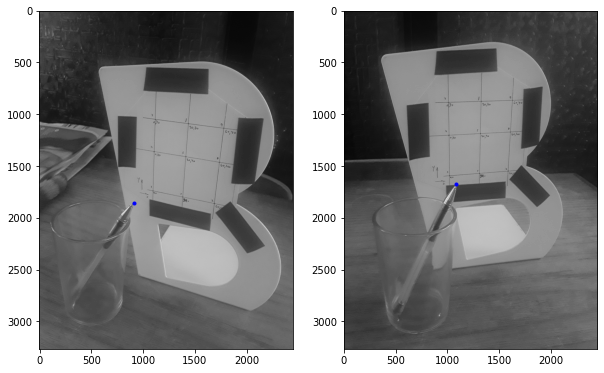

In [17]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,8)

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

for k in particleCoords.keys():
    ax[k].plot(particleCoords[k][0], particleCoords[k][1], 'bo', ms=3)


In [18]:
# setting up an imaging system for stereo matching:
imgSys = img_system([cam1, cam2])

In [19]:
# solving stereo matching:

d_max = 500.0

# solving stereo matching:
d_max = 5.0
position, cameras, epiDistance = imgSys.stereo_match(particleCoords, d_max)

print('estimated position: ', position)
print('epipolar distance: ', epiDistance)

estimated position:  [-0.59480269  8.82802282 38.01577332]
epipolar distance:  1.4670511311872274
